In [1]:
#initializing workspace
import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *
from scipy.signal import argrelextrema

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

# print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
# print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

flank = 2000

seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]

print(len(os.listdir(pathDir)))
print(len(data_files_3end))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/plotting.py:485: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plotAndFolding(df=pd.DataFrame(),dG=pd.Series(), title="", start=None, stop=None,


816
162


### combininig a and b for LP230802 datasets

In [2]:
for name in df01b_RDN372_datasets_3end.filter(regex='LP230802').columns.values:
    if 'a_' in name:
        print(name)
        a = df01b_RDN372_datasets_3end[name].replace(np.nan,0.0)
        
        nameb = name.replace('a_','b_')
        b = df01b_RDN372_datasets_3end[nameb].replace(np.nan,0.0)
        print(nameb)
        
        
        namenew = name.replace('a_','_')
        print(namenew)
        
        df01b_RDN372_datasets_3end[namenew] = a.add(b).replace(0.0, np.nan)
        df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)

LP230802_Rpa135HTP_Rpa12dC_none_1a_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC_none_1b_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_2a_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_2b_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_2_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1a_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1b_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2a_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2b_PROFILE_3end
LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_1a_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_1b_PROFILE_3end
LP230802_Rpa135HTP_nsi1d_none_1_PROFILE_3end
LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end
LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end
LP230802_Rpa135HTP_wt_none_1_PROFILE_3end


/tmp/ipykernel_17045/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)
/tmp/ipykernel_17045/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)
/tmp/ipykernel_17045/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3end = df01b_RDN372_datasets_3end.drop([name,name.replace('a_','b_')],1)
/tmp/ipykernel_17045/2958656166.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df01b_RDN372_datasets_3

# Fig 2 Rpc12dC

In [3]:
df11_Rpa135_wt_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','wt'], 
                                     let_out=['Rpa12dC',"noUV","LP230405"],stats=True)

#should I use 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end'?

df12_Rpa135_rpa12d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'],let_out=['C23P2','wt',"LP230405",'nsi1d'],stats=True)

Experiments: 
['C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1_PROFILE_3end']
Experiments: 
['EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_4_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_3_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end']


/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

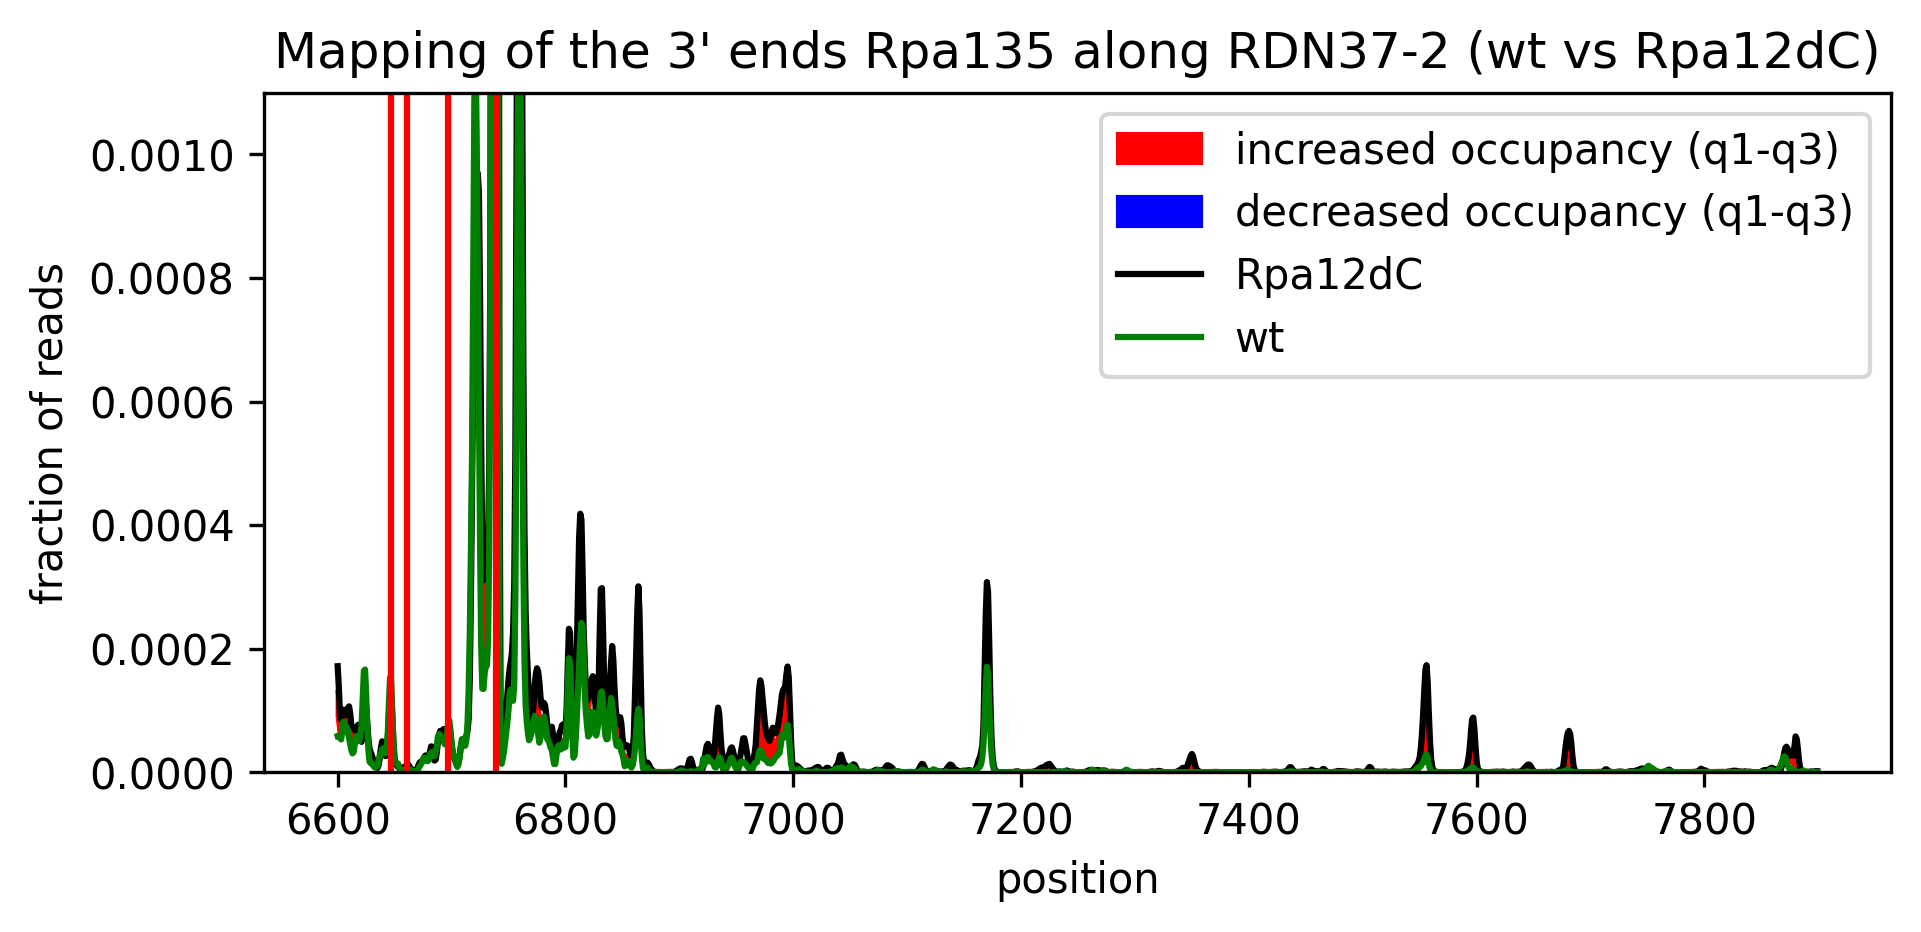

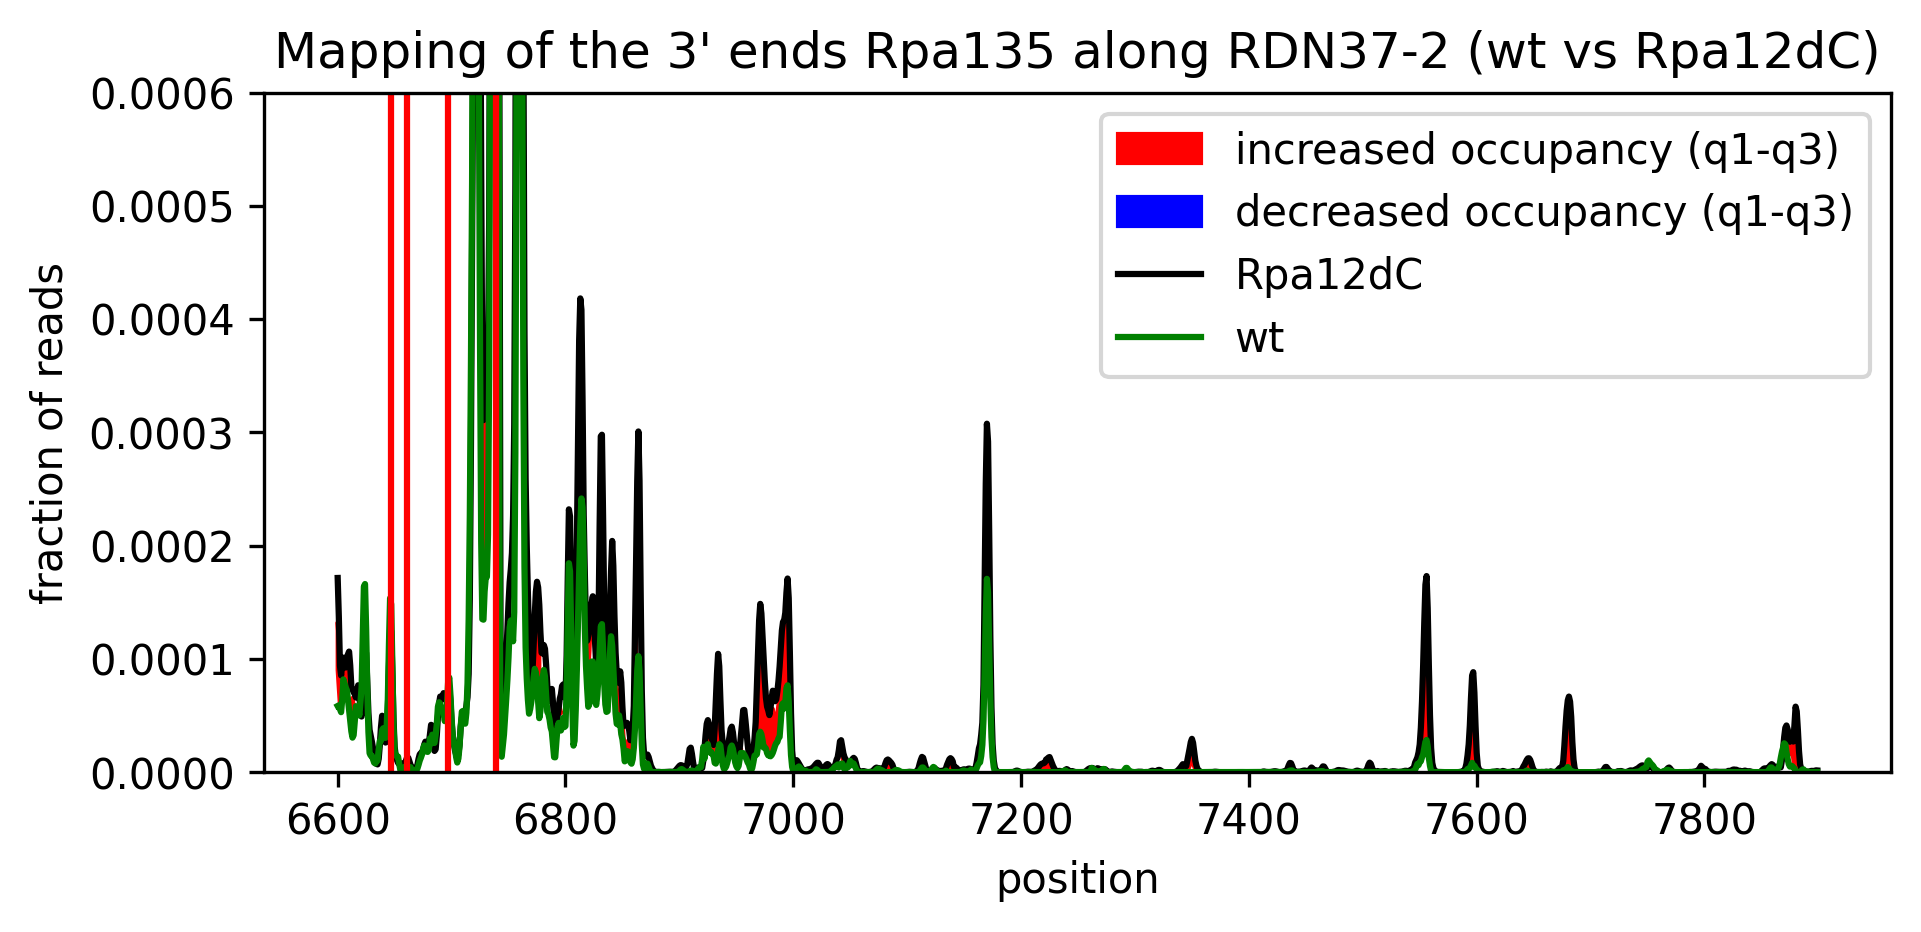

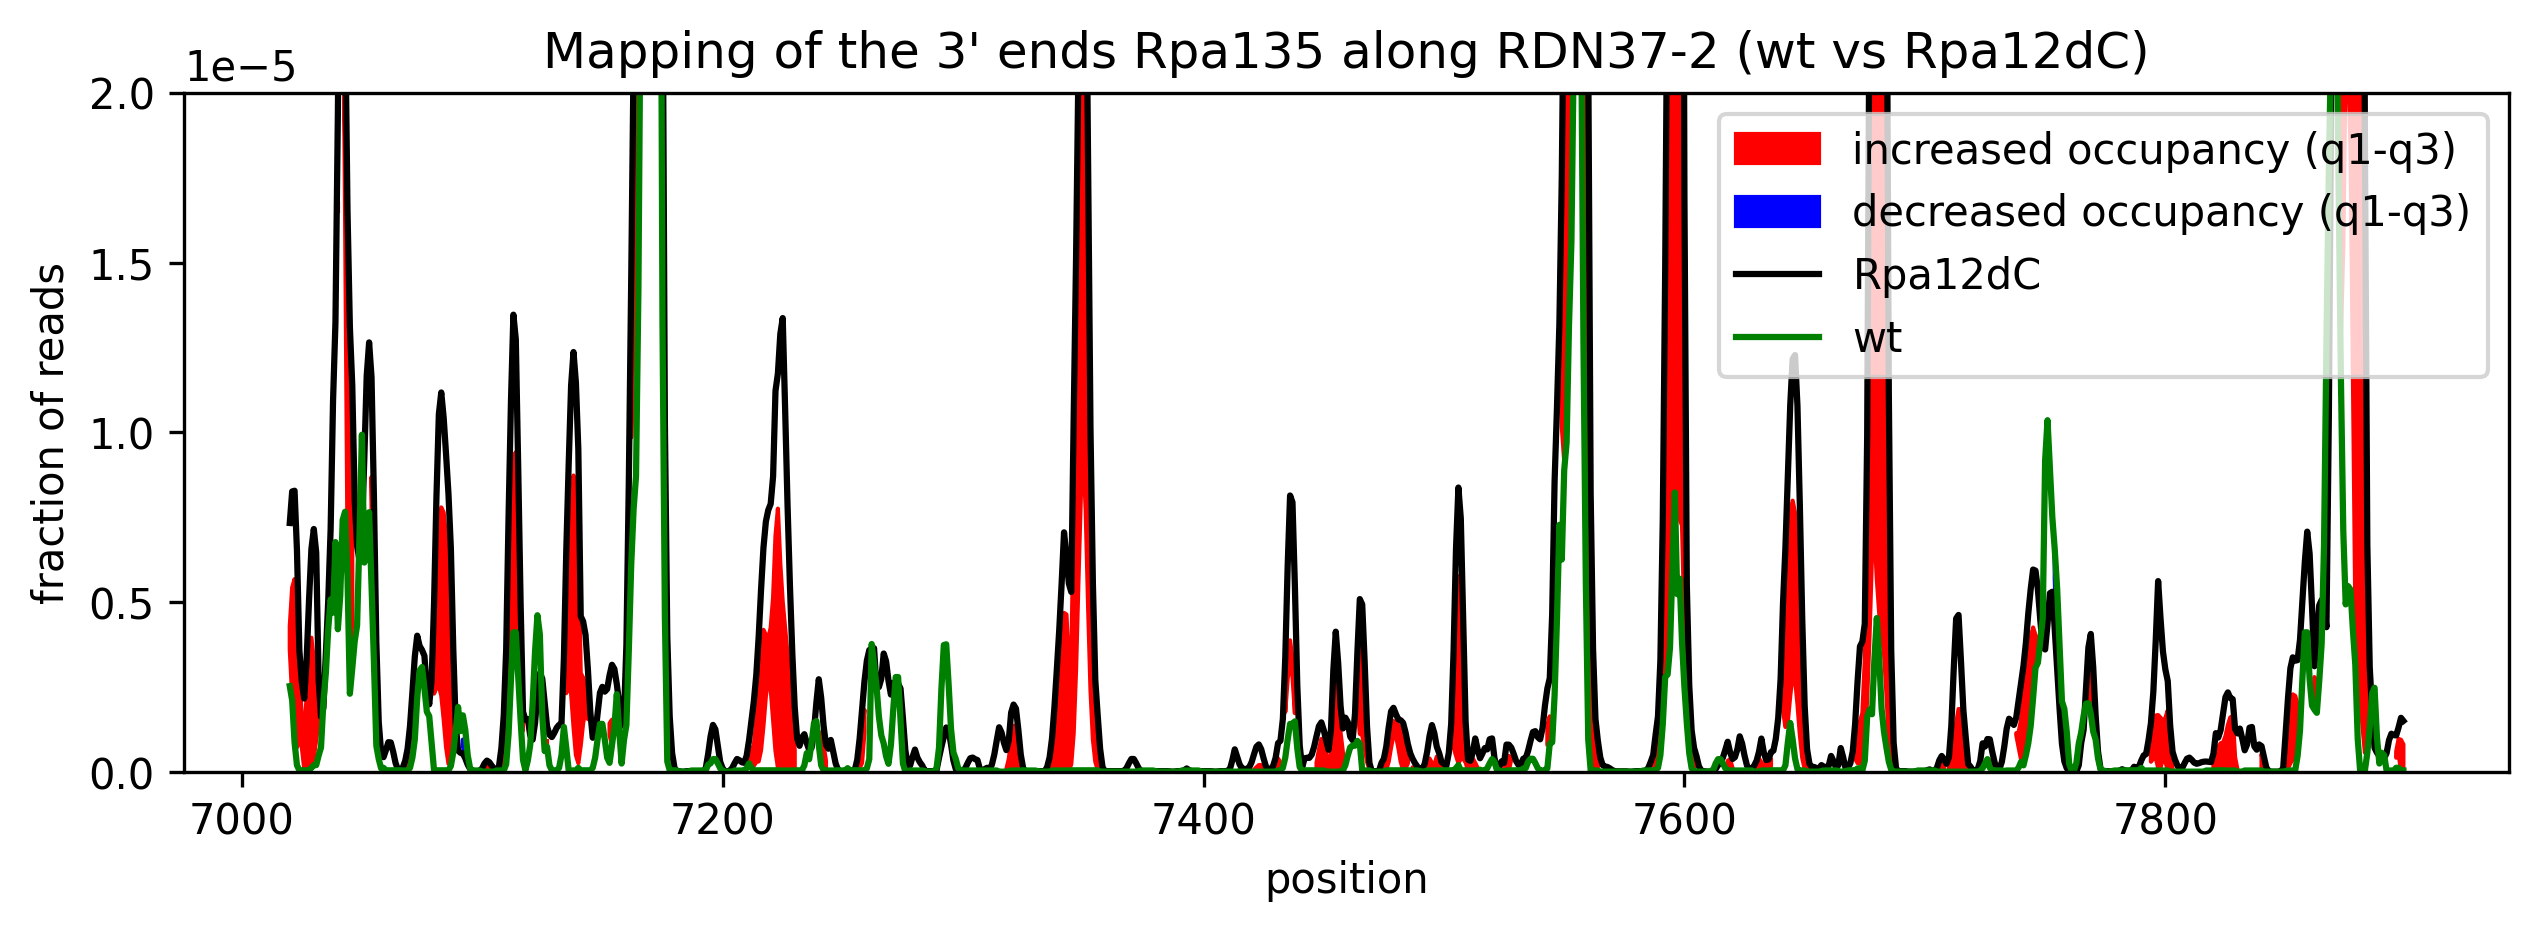

In [4]:
start=6600+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0011),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2D.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0006),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2Dv2.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.00002),ranges='qq',
                           start=1300+7020, stop=stop, fname='Fig_S2C.png')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

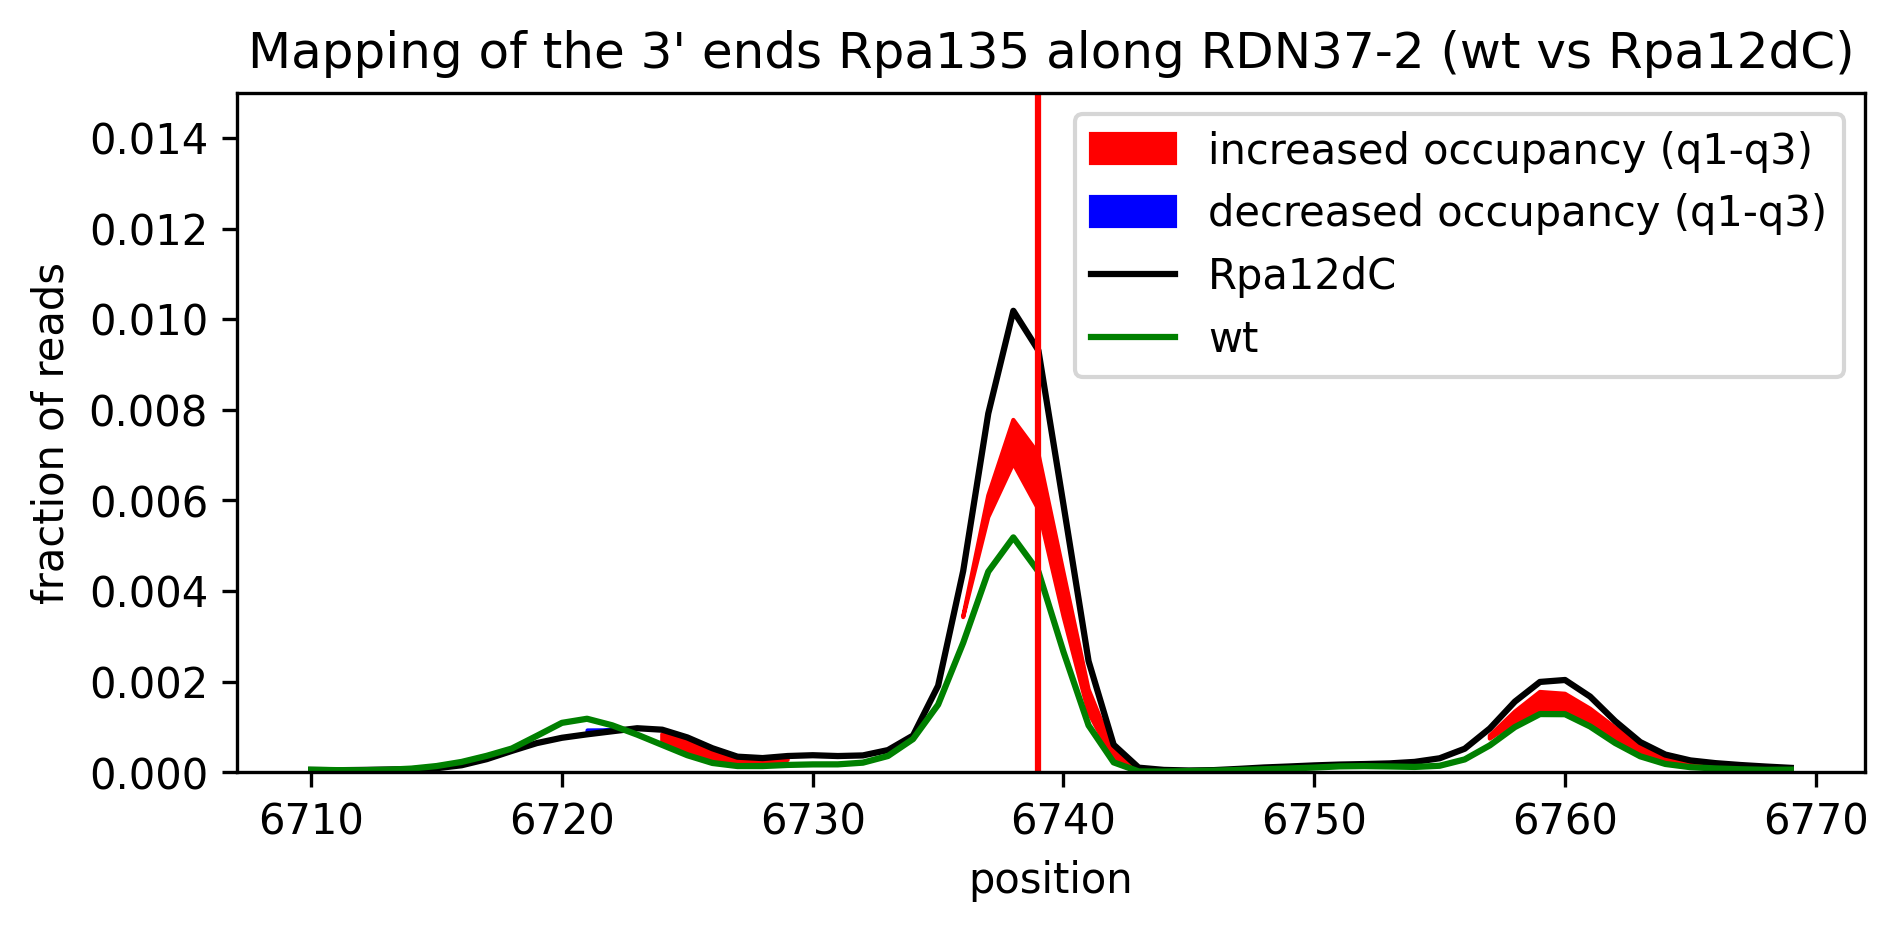

In [5]:
start=6710+1300
stop=6770+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.015),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2F_plot.png')

Experiments: 
['C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1_PROFILE_3end']
Experiments: 
['EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_4_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_3_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end']


<AxesSubplot:>

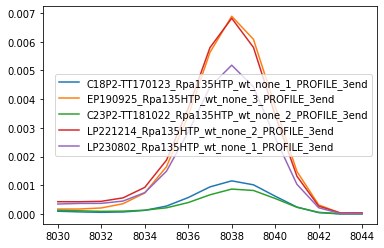

In [6]:
#add plot with statistics

df21_Rpa135_wt_3end_raw = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC',"noUV",'nsi1d','LP230405'],stats=False)

df22_Rpa135_rpa12d_3end_raw = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'],let_out=['C23P2','nsi1d','LP230405'],stats=False)


df21_Rpa135_wt_3end_raw[start+20:stop-25].plot()

<AxesSubplot:>

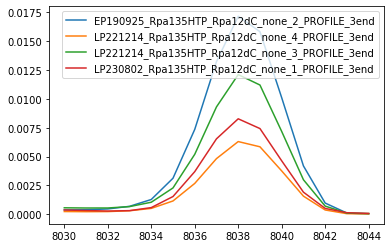

In [7]:
df22_Rpa135_rpa12d_3end_raw[start+20:stop-25].plot()

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

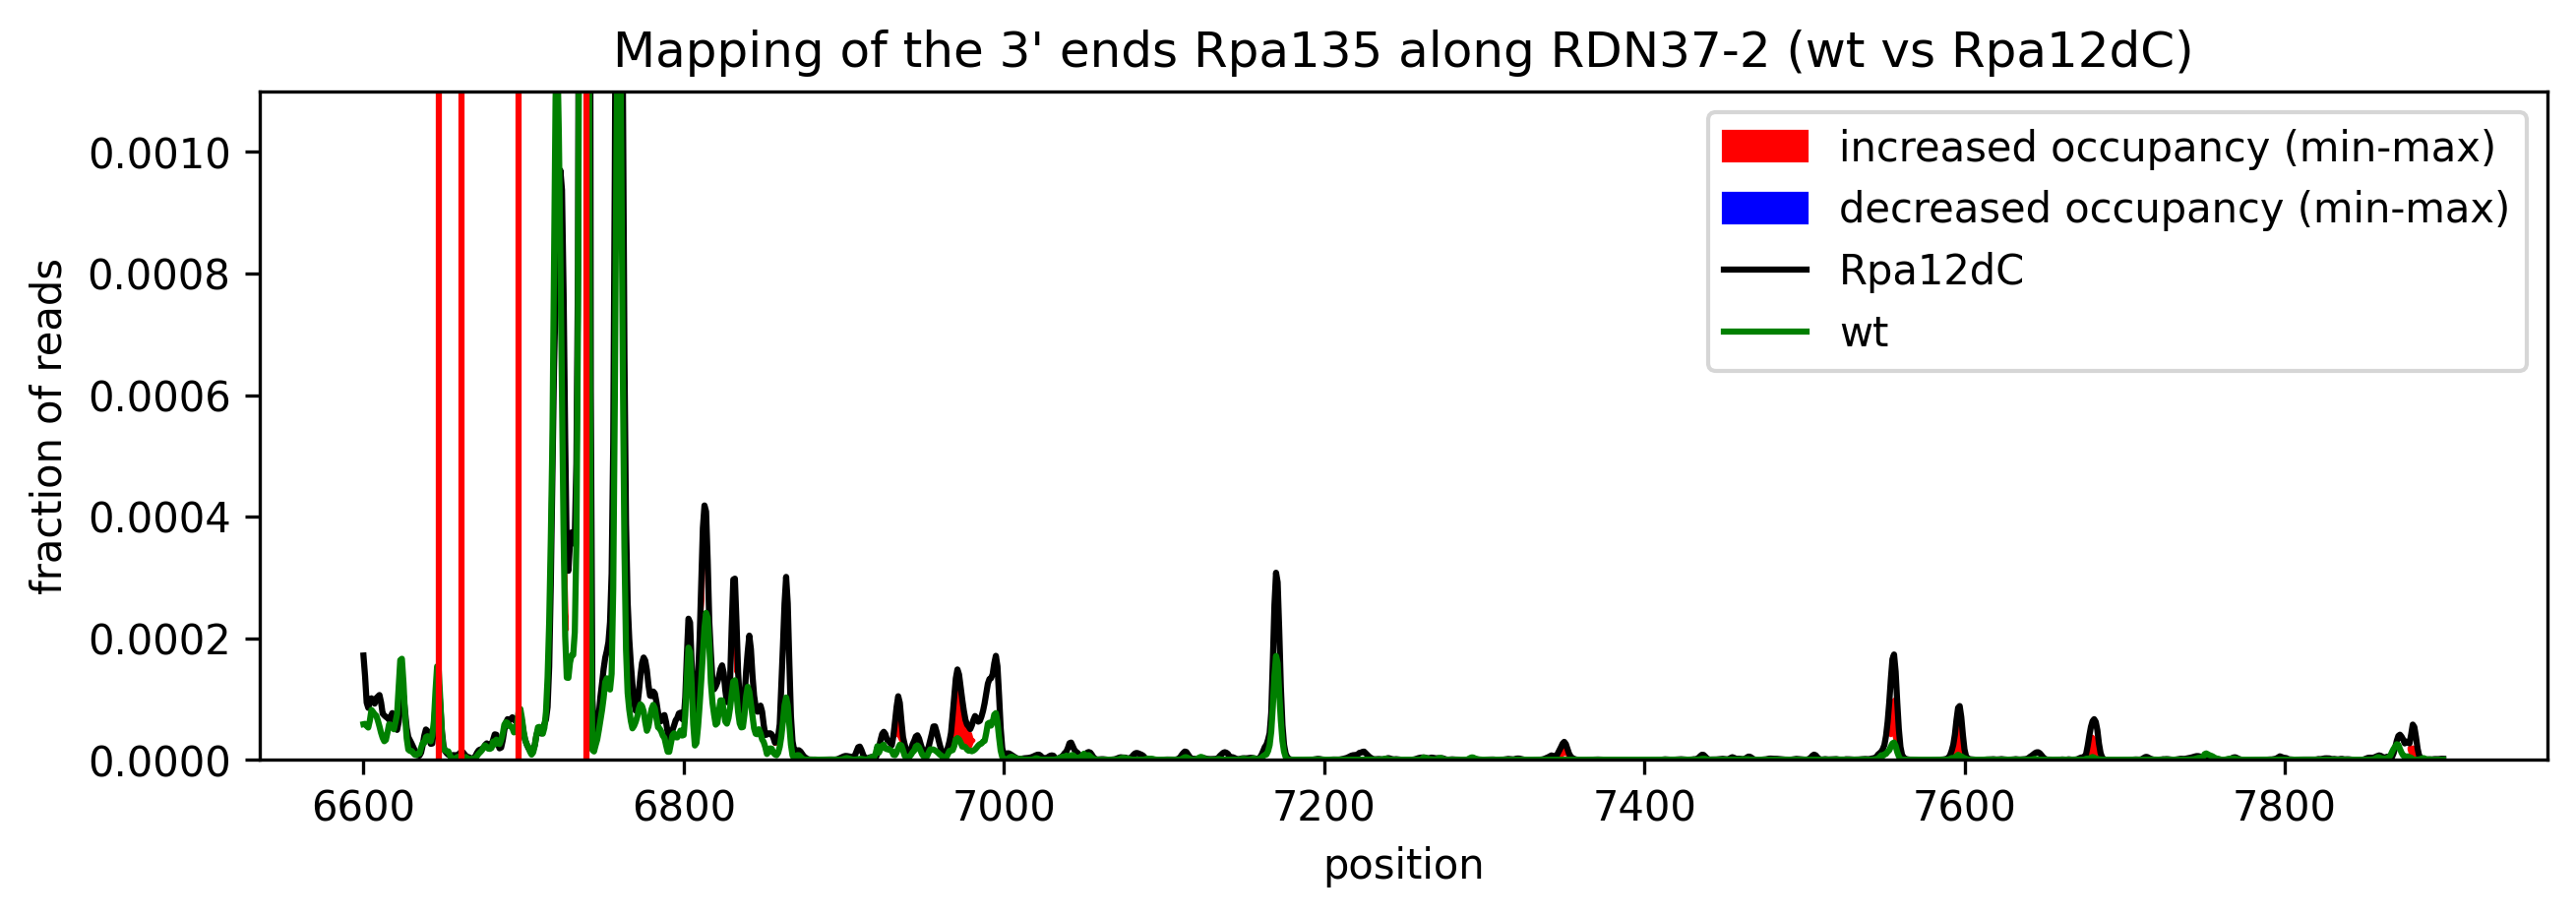

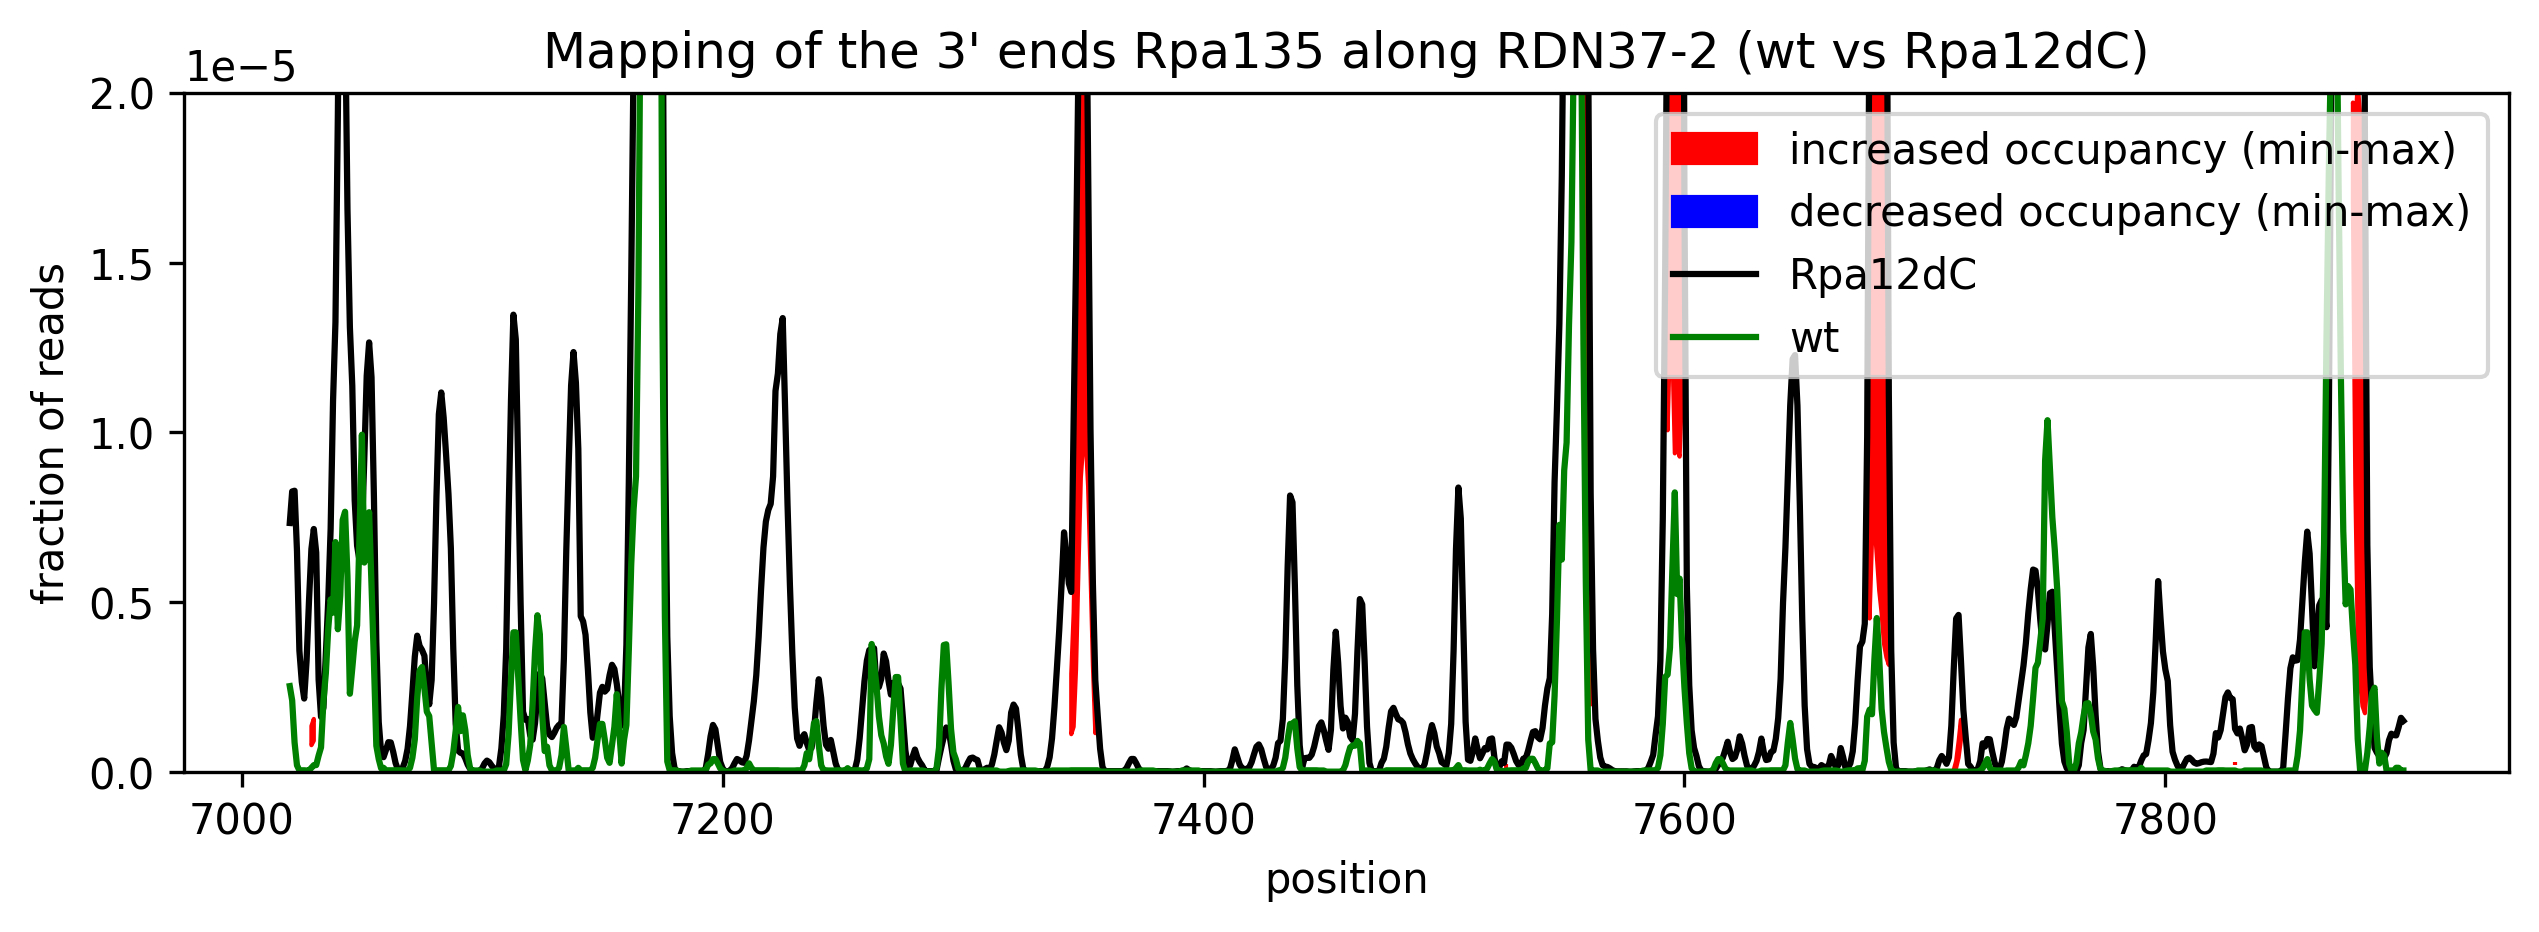

In [8]:
start=6600+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0011),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2D_v_minmin.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.00002),ranges='mm',
                           start=1300+7020, stop=stop, fname='Fig_S2C_v_minmin.png')

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

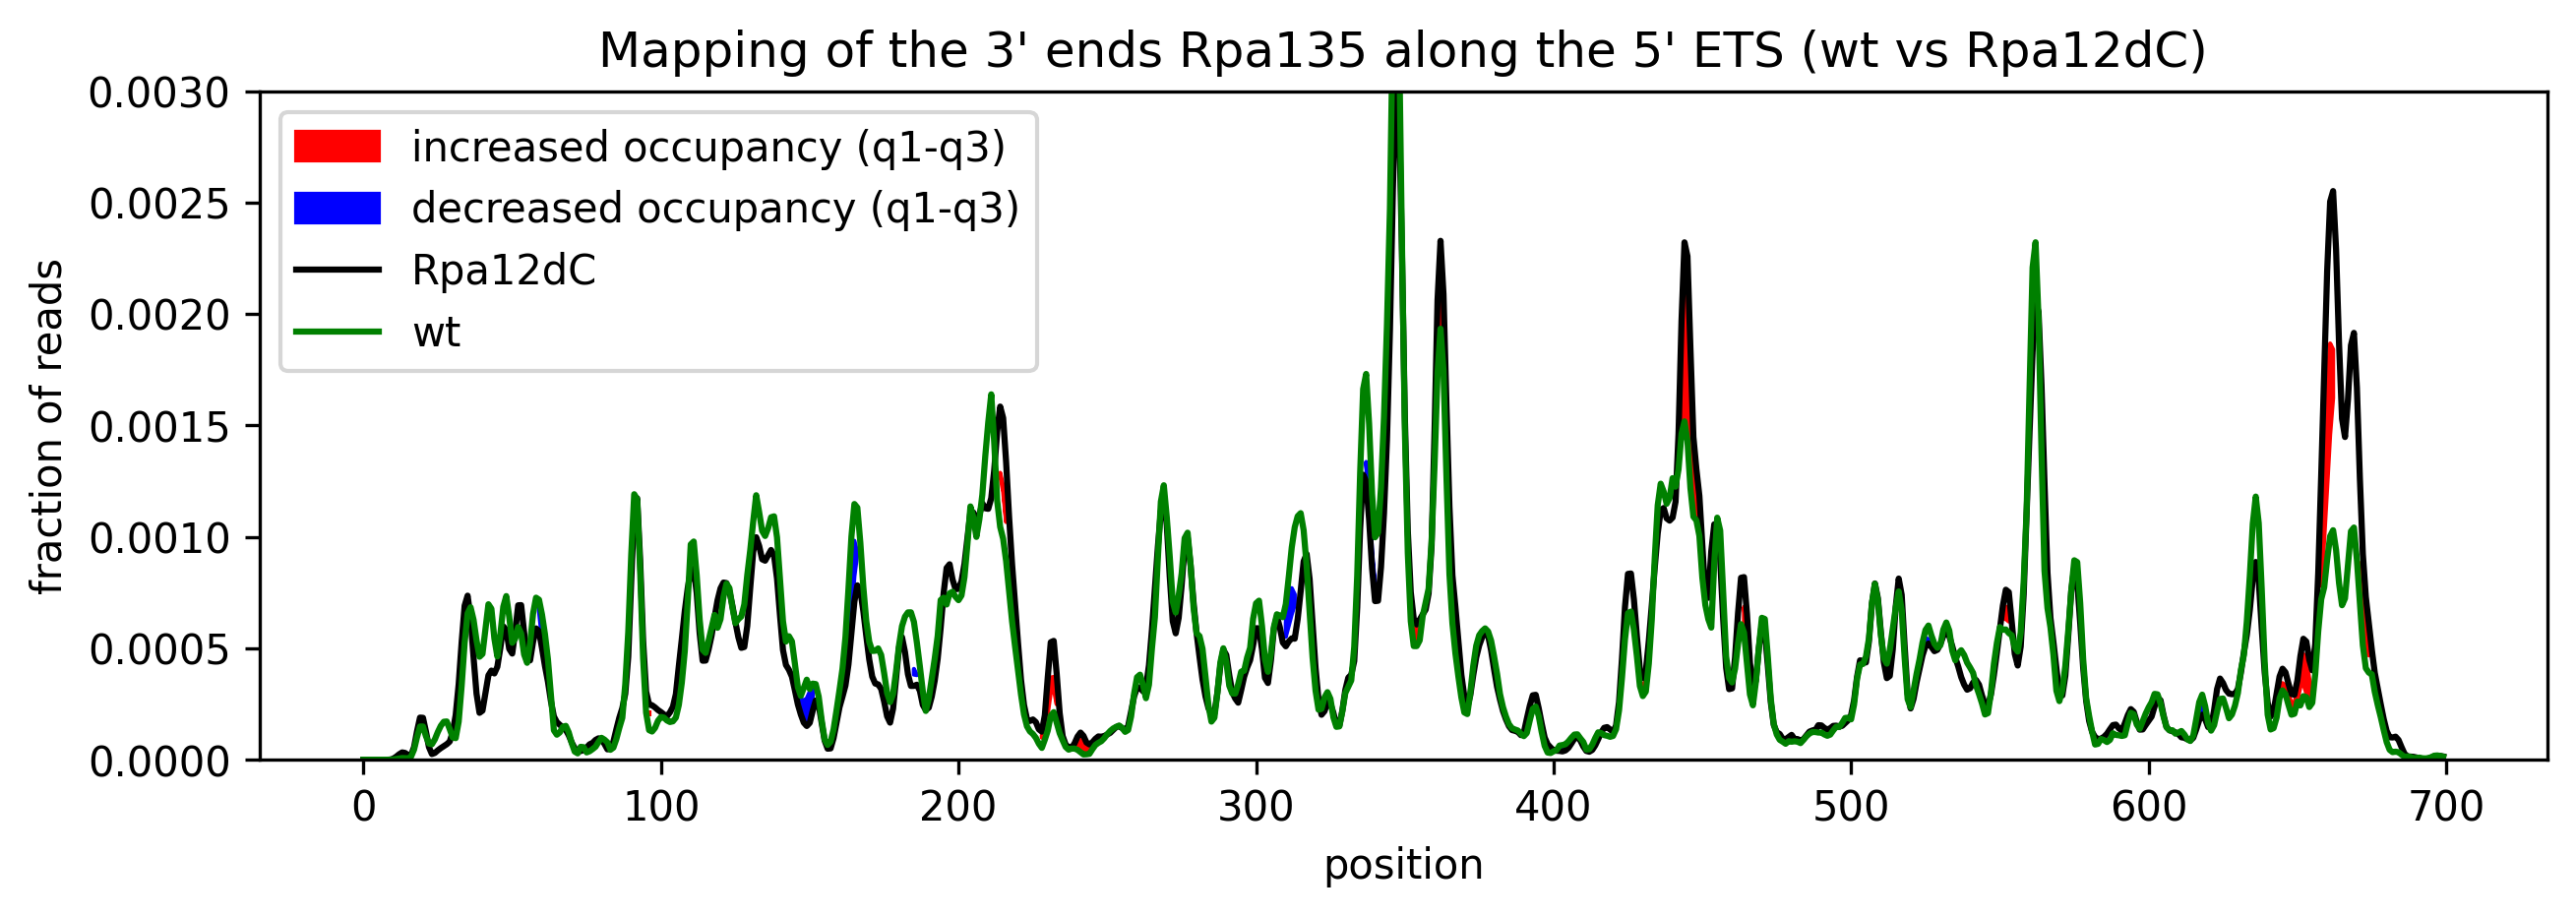

In [9]:
start = 0+1300
stop = 700+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along the 5' ETS (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.003),ranges='qq',
                           start=start, stop=stop, fname='Fig_2F.png')

There is too high variability in the data to compare size of the termination peak. More replicates would be needed

In [10]:
# check kinetics of RNAPI wt and Rpa12dC  - sums, or tilted cumsum

1.2847411585842409e-188
4.454669104429731e-46


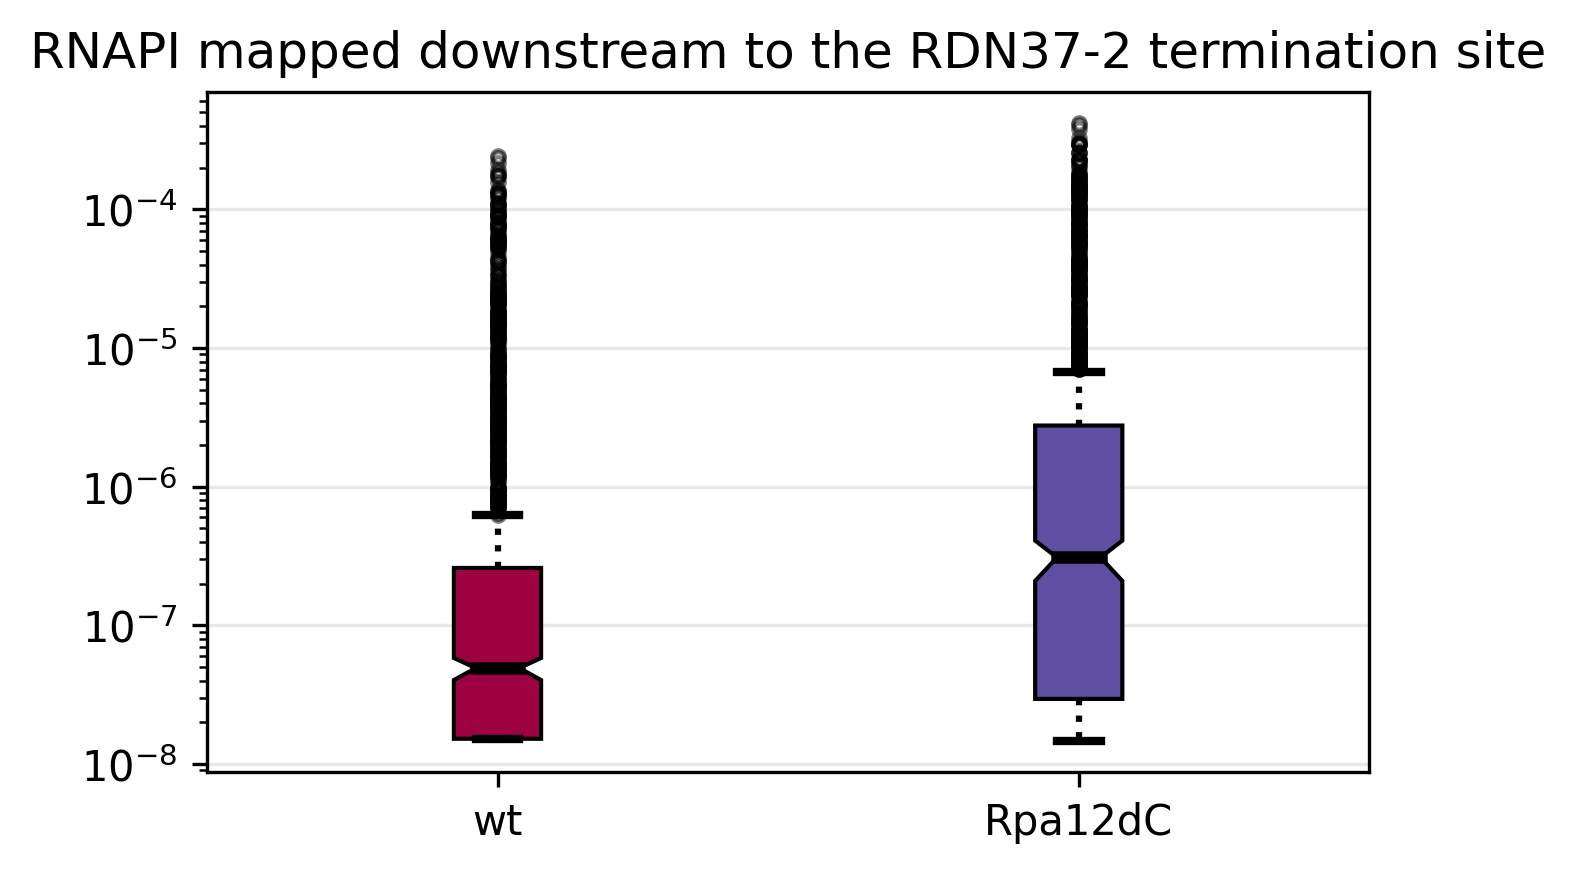

In [11]:
wt = df11_Rpa135_wt_3end[8100:] #60nt downstream the T1 site
a12dC = df12_Rpa135_rpa12d_3end[8100:]

data = [wt['median'].dropna().tolist(),a12dC['median'].dropna().tolist()]
labels=["wt","Rpa12dC"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(5,3),dpi=300,fname='Fig_2E.png',
                     title="RNAPI mapped downstream to the RDN37-2 termination site")

from scipy import stats

out = stats.wilcoxon(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])
out = stats.ranksums(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])

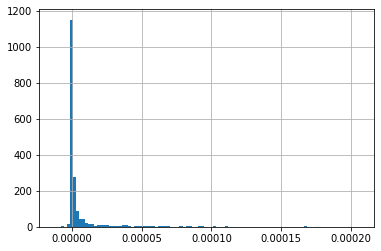

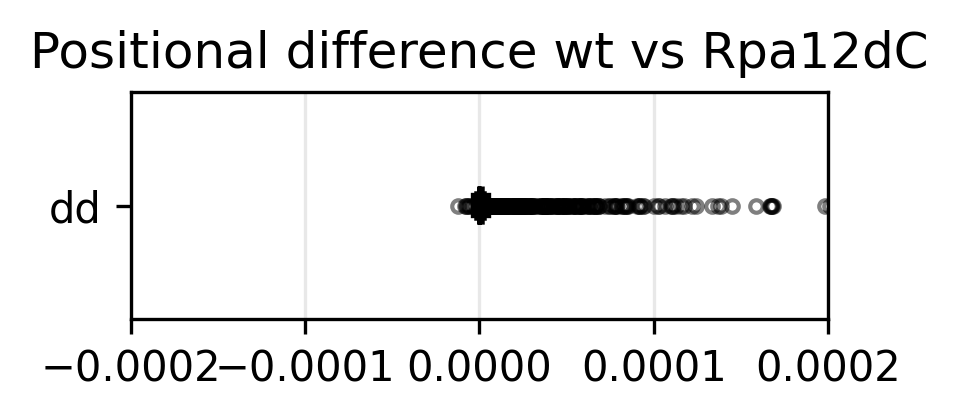

In [12]:
dd = a12dC['median']-wt['median']

dd.hist(bins=100)
plt.show()

tt.plotting.boxplot1(dd.dropna().tolist(),labels=["dd"],grid=True,figsize=(3,1),dpi=300,title="Positional difference wt vs Rpa12dC",vert=0,lim=(-0.0002,0.0002))

# Fig S Nsi1 role in termination

In [13]:
#preparing input files for nsi1d; merge reads for Xa and Xb files

for i in df01b_RDN372_datasets_3end.columns.values:
    if 'a_' in i:
        a = df01b_RDN372_datasets_3end[i]
        b = df01b_RDN372_datasets_3end[i.replace('a_','b_')]
        
        out = a.fillna(0)+b.fillna(0)
        
        if ( a.sum() + b.sum() ) == ( out.replace(0,np.nan).sum() ):
            print("correct: "+i)
            df01b_RDN372_datasets_3end[i.replace("a_","_")] = out
        else:
            print("error: "+i)

In [14]:
df11_Rpa135_wt_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','wt'], 
                                     let_out=['Rpa12dC',"noUV"],stats=True)

#should I use 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end'?

df12_Rpa135_nsi1d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','nsi1d','LP230802'],let_out=['Rpa12dC','W303'],stats=True)

Experiments: 
['C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230405_Rpa135HTP_wt_none_1_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_nsi1d_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_1_PROFILE_3end']


remove LP230405 from raw

/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

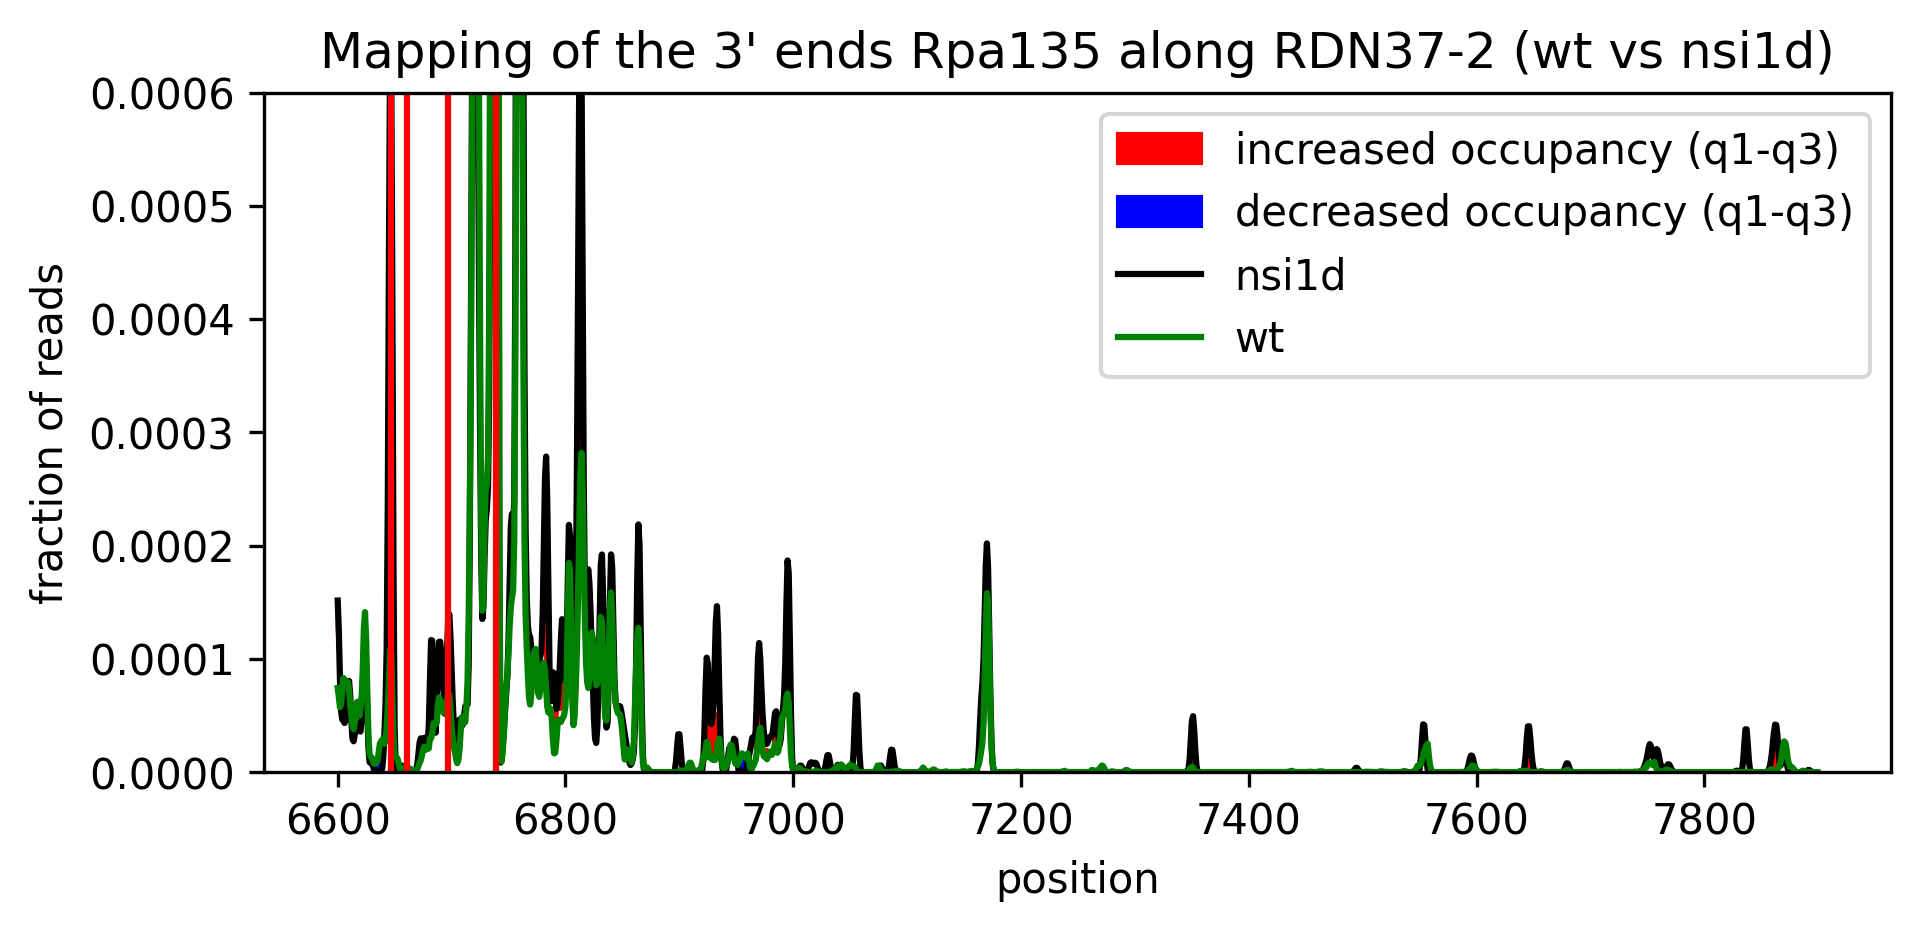

In [15]:
start=6600+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_nsi1d_3end,figsize=(7,3),label1="wt",label2="nsi1d",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs nsi1d)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0006),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_S2D.png')

# Role of Nsi1 in RNAPI termination in Rpa12dC mutant

In [16]:
df13_Rpa135_Rpa12dC_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'], 
                                     let_out=["noUV",'wt','nsi1d','C23',"a_",'b_'],stats=True)

#should I use 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end'?
df14_Rpa135_Rpa12dC_nsi1d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','nsi1d','Rpa12dC','LP230802'],let_out=['wt',"a_",'b_'],stats=True)

Experiments: 
['EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_4_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_3_PROFILE_3end', 'LP230405_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2_PROFILE_3end']


/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

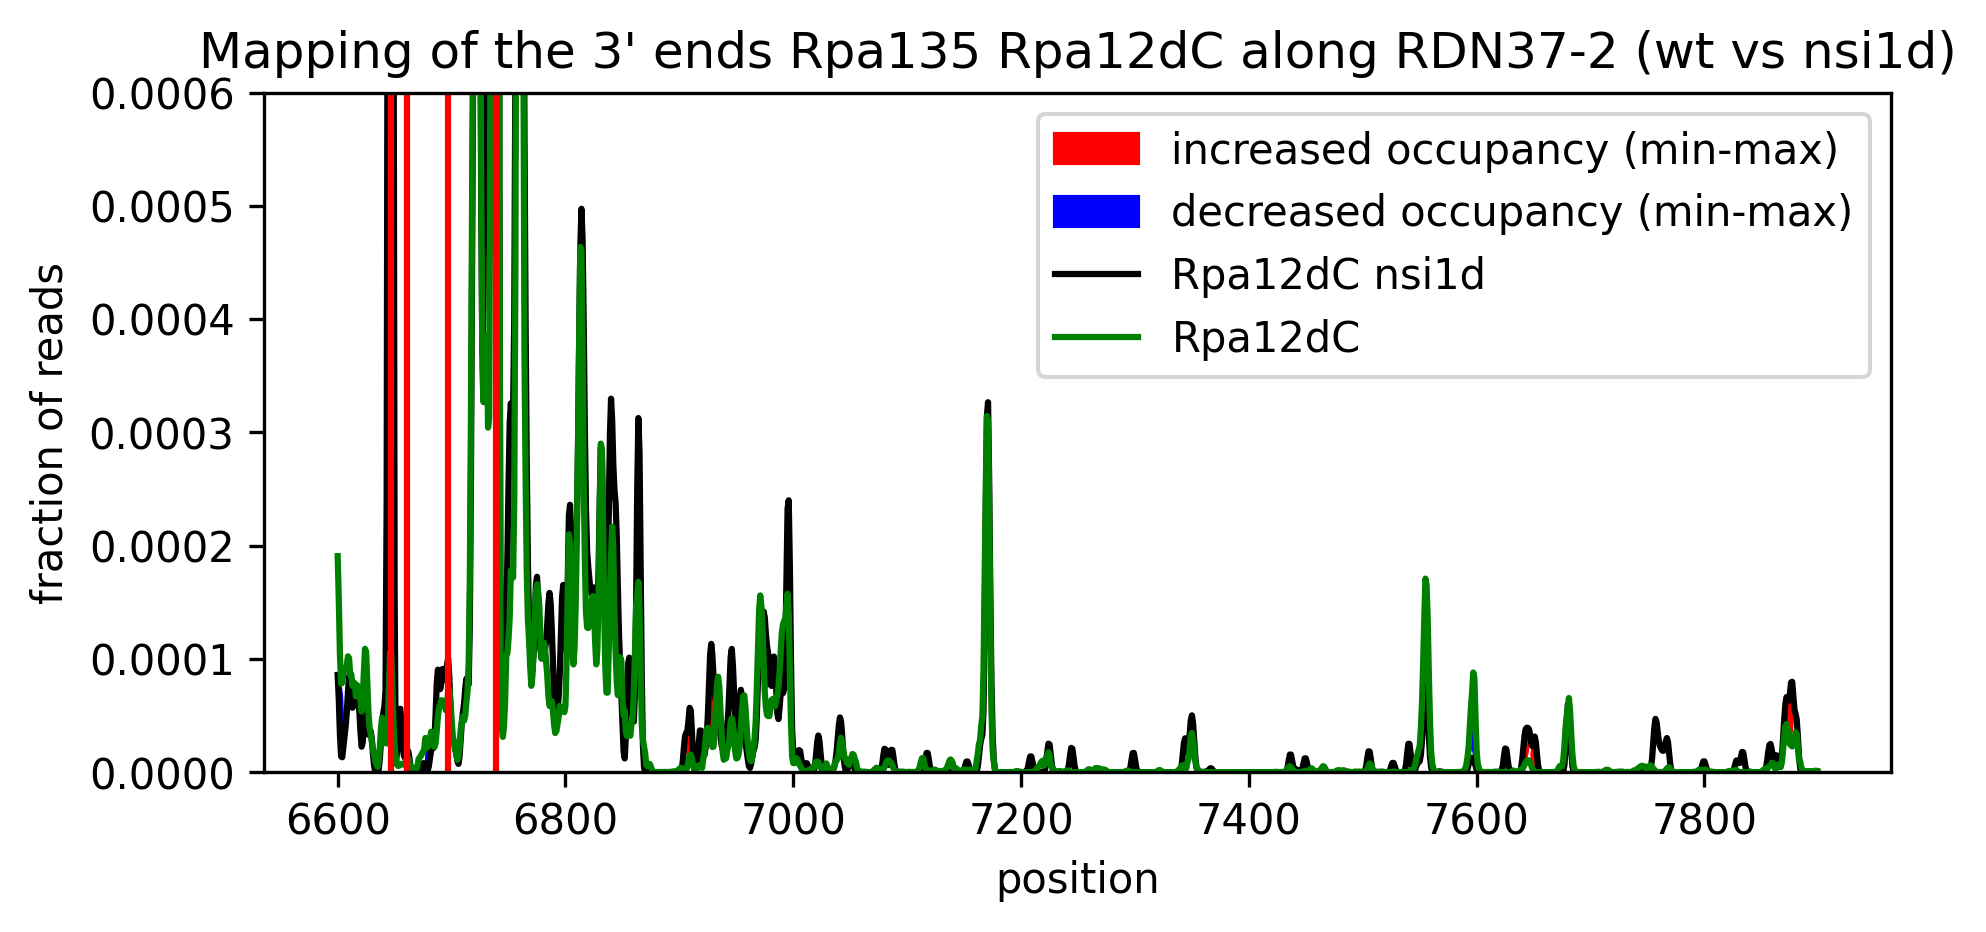

In [17]:
start=6600+1300
stop=7900+1300

tt.plotting.plot_diff(ref=df13_Rpa135_Rpa12dC_3end, dataset=df14_Rpa135_Rpa12dC_nsi1d_3end,figsize=(7,3),label1="Rpa12dC",label2="Rpa12dC nsi1d",
                           title="Mapping of the 3' ends Rpa135 Rpa12dC along RDN37-2 (wt vs nsi1d)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0006),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_S2E_nsi1d_effect_in_Rpc12dC.png')

# Role of Rpa12dC in RNAPI termination in nsi1d

Experiments: 
['LP230802_Rpa135HTP_nsi1d_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_1_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2_PROFILE_3end']


/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/anaconda3/lib/python3.9/site-packages/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

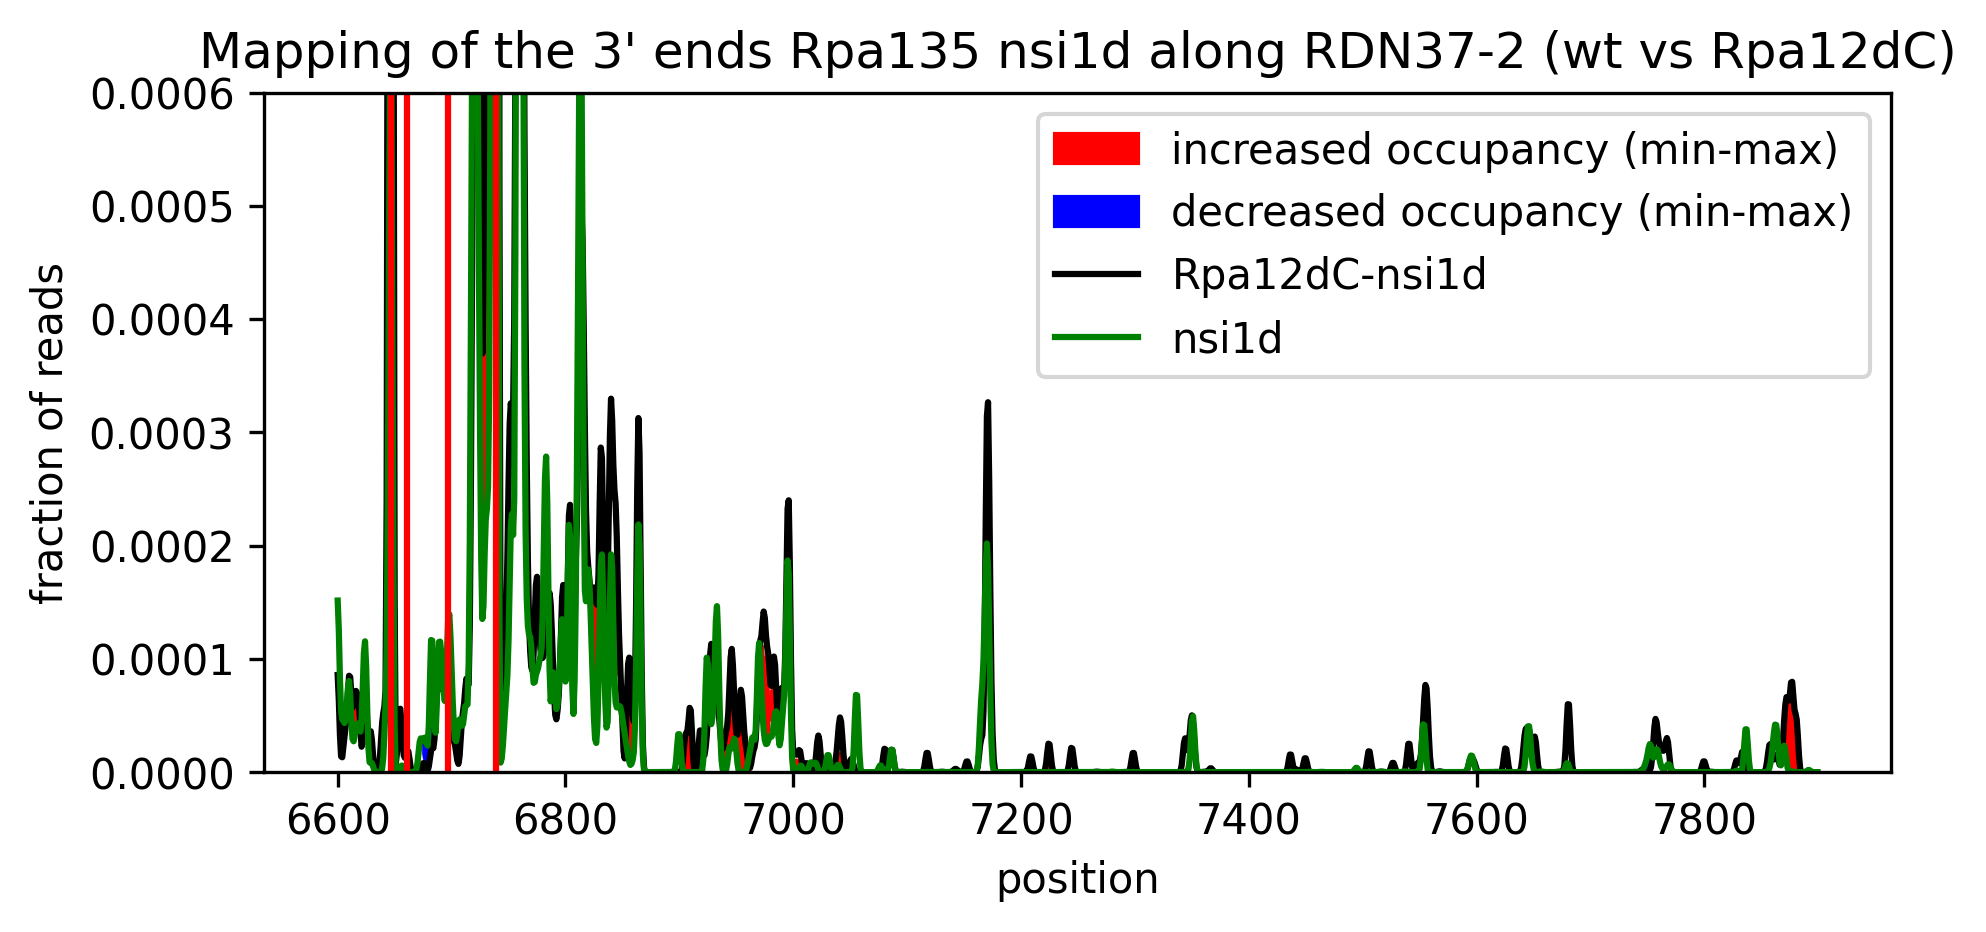

In [18]:
a = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['LP230802','Rpa135HTP_nsi1d_none'],let_out=["a_",'b_'], stats=True)
b = tt.profiles.preprocess(df01b_RDN372_datasets_3end,let_in=['LP230802','Rpa135HTP_Rpa12dC-nsi1d_none'],let_out=["a_",'b_'], stats=True)

start=6600+1300
stop=7900+1300
tt.plotting.plot_diff(ref=a, dataset=b,figsize=(7,3),label1='nsi1d',label2='Rpa12dC-nsi1d',
                           title="Mapping of the 3' ends Rpa135 nsi1d along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0006),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2F_Rpa12dC_effect_in_nsi1d_background.png')